In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my_basket=[['bread','butter','wine','bananas','coffee','carrots'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['beer','chips','asparagus','salsa','milk','apples'],
           ['olive oil','bread','butter','tomatoes','steak','carrots'],
           ['tomatoes','onions','chips','wine','ketchup','orange juice'],
           ['bread','butter','beer','chips','milk'],
           ['butter','tomatoes','carrots','coffee','sugar'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['bread','butter','ketchup','coffee','chicken wings'],
           ['butter','beer','chips','asparagus','apples'],
           ['tomatoes','onion','beer','chips','milk','coffee']]


In [3]:
sum([all(z in i for z in ['bread','butter']) for i in my_basket])

4

In [4]:
def get_metrics(x,y):
  fx_ = sum([x in i for i in my_basket])
  fy_ = sum([y in i for i in my_basket])
  fxy_ = sum([all(z in i for z in [x,y]) for i in my_basket])
  #Metricas
  support = fx_/len(my_basket)
  confidence = support/(fx_/len(my_basket))
  lift = confidence/(fy_/len(my_basket))
  return support,confidence,lift

In [5]:
get_metrics('bread','butter')

(0.36363636363636365, 1.0, 1.8333333333333335)

support  -> 36% de las notas tinene pan, en todas tiene

confidence -> Dado el primer parametro que tan probable es el segundo

lift -> que tan probable es que dado el segundo parametro este el primero si es mayor que uno me dice que es valido , si es mayor que uno existe una relacion

In [6]:
groceries = pd.read_csv(r"D:\Ciencia de Datos\5to\Paradigmas\Tema_1\1.3_Analisis_predictivo\groceries.csv", sep=';')
groceries.head()

,ID,Transaction
0,0,"milk,bread,biscuit"
1,1,"bread,milk,biscuit,cereal"
2,2,"bread,tea"
3,3,"jam,bread,milk"
4,4,"tea,biscuit"


In [7]:
# separar productos ind
transactions = list(groceries.Transaction.apply(lambda x:sorted(x.split(','))))
transactions

[['biscuit', 'bread', 'milk'],
 ['biscuit', 'bread', 'cereal', 'milk'],
 ['bread', 'tea'],
 ['bread', 'jam', 'milk'],
 ['biscuit', 'tea'],
 ['bread', 'tea'],
 ['cereal', 'tea'],
 ['biscuit', 'bread', 'tea'],
 ['bread', 'jam', 'tea'],
 ['bread', 'milk'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['coffee', 'sugar'],
 ['bread', 'coffee', 'orange'],
 ['biscuit', 'bread', 'sugar'],
 ['cereal', 'coffee', 'sugar'],
 ['biscuit', 'bread', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['cereal', 'coffee', 'milk', 'tea']]

In [8]:
# tabla binaria
from mlxtend.preprocessing import TransactionEncoder
enc = TransactionEncoder().fit(transactions)
onehot = enc.transform(transactions)
onehot

array([[ True,  True, False, False, False,  True, False, False, False],
       [ True,  True,  True, False, False,  True, False, False, False],
       [False,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True,  True, False, False, False],
       [ True, False, False, False, False, False, False, False,  True],
       [False,  True, False, False, False, False, False, False,  True],
       [False, False,  True, False, False, False, False, False,  True],
       [ True,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False, False,  True],
       [False,  True, False, False, False,  True, False, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [False, False, False,  True, False, False, False,  True, False],
       [False,  True, False,  True, False, False,  True, False, 

In [9]:
# DataFrame
onehot = pd.DataFrame(onehot,columns=enc.columns_)
onehot

,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
0,True,True,False,False,False,True,False,False,False
1,True,True,True,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True
3,False,True,False,False,True,True,False,False,False
4,True,False,False,False,False,False,False,False,True
5,False,True,False,False,False,False,False,False,True
6,False,False,True,False,False,False,False,False,True
7,True,True,False,False,False,False,False,False,True
8,False,True,False,False,True,False,False,False,True
9,False,True,False,False,False,True,False,False,False


In [10]:
#obtene los conjuntos frecuentes
from mlxtend.frequent_patterns import apriori, association_rules
freq_itemssets = apriori(onehot, min_support= 0.01, max_len=3,use_colnames=True) # max_len para que no deje pasar conjunetos de mas de n elementos
freq_itemssets.head(10)

,support,itemsets
0,0.40,(biscuit)
1,0.65,(bread)
2,0.30,(cereal)
3,0.40,(coffee)
4,0.10,(jam)
5,0.25,(milk)
6,0.15,(orange)
7,0.30,(sugar)
8,0.35,(tea)
9,0.25,"(biscuit, bread)"


In [11]:
freq_itemssets.tail(5)

,support,itemsets
49,0.10,"(cereal, orange, coffee)"
50,0.05,"(sugar, cereal, coffee)"
51,0.05,"(tea, cereal, coffee)"
52,0.05,"(tea, milk, cereal)"
53,0.05,"(tea, milk, coffee)"


In [12]:
#Reglas de asociacion
rules = association_rules(freq_itemssets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,0.0300,1.120000,0.333333
1,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,0.0300,1.200000,0.285714
2,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,0.0000,1.000000,0.000000
3,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,0.0000,1.000000,0.000000
4,(biscuit),(orange),0.40,0.15,0.10,0.250000,1.666667,0.0400,1.133333,0.666667
...,...,...,...,...,...,...,...,...,...,...
111,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474
112,"(milk, coffee)",(tea),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf,0.684211
113,(tea),"(milk, coffee)",0.35,0.05,0.05,0.142857,2.857143,0.0325,1.108333,1.000000
114,(milk),"(tea, coffee)",0.25,0.05,0.05,0.200000,4.000000,0.0375,1.187500,1.000000


In [13]:
# Reglas que tengan 2 elemntos en el antecedente(lhs)
rules['lhs_items'] = rules.antecedents.apply(lambda x: len(x))
rules[rules.lhs_items>1].sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
59,"(biscuit, coffee)",(orange),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf,0.944444,2
52,"(biscuit, cereal)",(orange),0.15,0.15,0.10,0.666667,4.444444,0.0775,2.55,0.911765,2
64,"(bread, cereal)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
111,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
41,"(biscuit, coffee)",(cereal),0.10,0.30,0.10,1.000000,3.333333,0.0700,inf,0.777778,2
53,"(biscuit, orange)",(cereal),0.10,0.30,0.10,1.000000,3.333333,0.0700,inf,0.777778,2
87,"(milk, coffee)",(cereal),0.05,0.30,0.05,1.000000,3.333333,0.0350,inf,0.736842,2
101,"(tea, coffee)",(cereal),0.05,0.30,0.05,1.000000,3.333333,0.0350,inf,0.736842,2
93,"(cereal, coffee)",(orange),0.20,0.15,0.10,0.500000,3.333333,0.0700,1.70,0.875000,2
104,"(tea, milk)",(cereal),0.05,0.30,0.05,1.000000,3.333333,0.0350,inf,0.736842,2


In [14]:
from math import pi
# Convertir a la tabla con 'lift' como pivote , cambiar 'frozenset' a cadenas
rules['antecedents_']=rules.antecedents.apply(lambda x: ', '.join(list(x)))
rules['consequents_']=rules.consequents.apply(lambda x: ', '.join(list(x)))
#Tabla con pivote
pivot = rules[rules.lhs_items>1].pivot(index = 'antecedents_',
                                       columns = 'consequents_',
                                       values = 'lift')
pivot

consequents_,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
antecedents_,,,,,,,,,
"biscuit, bread",NaN,NaN,NaN,NaN,NaN,1.600000,NaN,1.333333,NaN
"biscuit, cereal",NaN,NaN,NaN,1.666667,NaN,1.333333,4.444444,NaN,NaN
"biscuit, coffee",NaN,NaN,3.333333,NaN,NaN,NaN,6.666667,NaN,NaN
"biscuit, milk",NaN,1.538462,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
"biscuit, orange",NaN,NaN,3.333333,2.500000,NaN,NaN,NaN,NaN,NaN
"biscuit, sugar",NaN,1.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"bread, cereal",2.500000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
"bread, coffee",NaN,NaN,NaN,NaN,NaN,NaN,2.222222,2.222222,NaN
"bread, jam",NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.428571


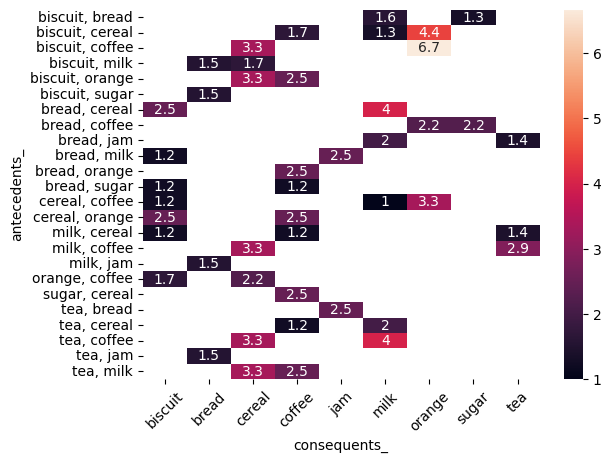

In [15]:
#heatmap
import seaborn as sns
sns.heatmap(pivot, annot=True)
plt.xticks(rotation=45)
plt.show()